## Finding the two best markets to advertise the product of an e-learning company.

Most of the courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc. We want to promote the product and we'd like to invest some money in advertisement. In this case we need to find out two best markets to advertise the product.

In [68]:
import pandas as pd

In [69]:
surveys = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False, encoding='Latin')

In [70]:
surveys.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
surveys.shape

(18175, 136)

This dataset has been taken from the link https://github.com/freeCodeCamp/2017-new-coder-survey for practice purpose. Using readymade data is convenient rather performing a survey for the pratice purpose. 

In [106]:
import matplotlib.pyplot as plt

We shall drop all the rows where participants didn't answer what role they are interested in. 

In [107]:
surveys_drop = surveys['JobRoleInterest'].dropna()

In [109]:
surveys_drop.head()

1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
6                             Full-Stack Web Developer
Name: JobRoleInterest, dtype: object

In [110]:
splited_interested_people =  surveys_drop.str.split(',')

In [111]:
number_of_options = splited_interested_people.apply(lambda x: len(x))

In [113]:
number_of_options.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Here we can see that around 31% have an good idea about their interest or what they eant to be and rest have a mixed interests.

## Frequency Table

In [114]:
specific_interest = surveys_drop.str.contains('Web Developer|Mobile Developer')

In [115]:
frequncy_table = specific_interest.value_counts(normalize=True)*100

In [116]:
frequncy_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

## Plot of Frequency Table

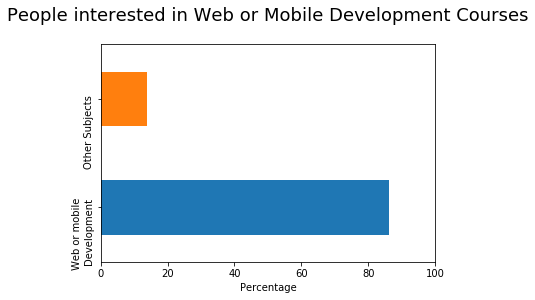

In [117]:
frequncy_table.plot.barh()
plt.title('People interested in Web or Mobile Development Courses',y=1.08,fontsize=18)
plt.xlabel('Percentage')
plt.yticks([0,1],['Web or mobile\nDevelopment', 'Other Subjects'], rotation=90)
plt.xlim(0, 100)
plt.show()

This figure shows that aroung 86% of people show their interests on wither web or mobile development. So our goal is to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

## New Coders locations 

* In this section we want to locate the new coders and their densities for each locations. For this we can first start with the frequency distribution table of the `CountryLive` variable which describe what country each learner currently living in.*
- We will only interested on the people who have answered what job role they are interested in.

In [93]:
job_role_answered = surveys[surveys['JobRoleInterest'].notnull()].copy()

In [95]:
job_role_answered.shape

(6992, 136)

In [96]:
absolute_frequency = job_role_answered['CountryLive'].value_counts()

In [97]:
absolute_frequency[:10]

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [100]:
relative_frequency = job_role_answered['CountryLive'].value_counts(normalize=True)*100

In [101]:
relative_frequency.head()

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

In [103]:
pd.DataFrame(data = {'Absolute Frequency': absolute_frequency, 'Percentage': relative_frequency})[:10]

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


So a biggest number of pleople are from US which is 45.7% and definitely the most targeted market. Indian has second highest percentage of learners though it is quite low in comparision to USA, only 7.7%. UK and Canada are in 3rd and 4th position respectively with the percentage of 4.6% and 3.8%.

This can be a conclusion but we can go a bit more in depth and to see how people are interested in spending money on learning. Because it is only profitable when people are willling to spen money.

## Spending money on learning

In [63]:
mone_learn = surveys['MoneyForLearning'].replace(0,1)
# mone_learn = surveys['MoneyForLearning'].fillna(0)

In [64]:
# mone_learn

In [74]:
mon_prog = surveys['MonthsProgramming']

In [75]:
surveys['spent per month'] = mon_prog/mone_learn

In [82]:
surveys['spent per month'].isnull().shape

(18175,)

In [83]:
surveys['spent per month'].dropna().shape

(16180,)

In [89]:
surveys['CountryLive'] = surveys['CountryLive'].dropna()

In [96]:
grouped = surveys['spent per month'].groupby(surveys['CountryLive']=='India')

In [97]:
grouped